In [1]:
import pandas as pd
df = pd.read_csv("data/housing_dataset_clean.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              172 non-null    object 
 1   price             164 non-null    float64
 2   locality          172 non-null    object 
 3   region            172 non-null    object 
 4   postal_code       172 non-null    int64  
 5   address           172 non-null    object 
 6   latitude          172 non-null    float64
 7   longitude         172 non-null    float64
 8   description       172 non-null    object 
 9   bedrooms          172 non-null    int64  
 10  bathrooms         172 non-null    int64  
 11  floor_size_sq_ft  172 non-null    float64
 12  uniq_id           172 non-null    object 
 13  scraped_at        172 non-null    object 
dtypes: float64(4), int64(3), object(7)
memory usage: 14.2+ KB


In [2]:
df = df.dropna()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164 entries, 0 to 171
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              164 non-null    object 
 1   price             164 non-null    float64
 2   locality          164 non-null    object 
 3   region            164 non-null    object 
 4   postal_code       164 non-null    int64  
 5   address           164 non-null    object 
 6   latitude          164 non-null    float64
 7   longitude         164 non-null    float64
 8   description       164 non-null    object 
 9   bedrooms          164 non-null    int64  
 10  bathrooms         164 non-null    int64  
 11  floor_size_sq_ft  164 non-null    float64
 12  uniq_id           164 non-null    object 
 13  scraped_at        164 non-null    object 
dtypes: float64(4), int64(3), object(7)
memory usage: 14.7+ KB


In [4]:
mean_price_by_locality = df.groupby("locality")["price"].mean().sort_values(ascending = False)
print("mean_price_by_locality type:", type(mean_price_by_locality))
print("mean_price_by_locality : ", mean_price_by_locality )
mean_price_by_locality.head()

mean_price_by_locality type: <class 'pandas.core.series.Series'>
mean_price_by_locality :  locality
Laguna Beach     3966074.0
Sherman Oaks     3544838.5
Santa Barbara    3517472.0
Palo Alto        2462992.0
La Jolla         2206513.0
                   ...    
Corcoran          209645.0
Lamont            203852.0
Colusa            185300.0
Strathmore        171690.0
Taft              142128.0
Name: price, Length: 114, dtype: float64


locality
Laguna Beach     3966074.0
Sherman Oaks     3544838.5
Santa Barbara    3517472.0
Palo Alto        2462992.0
La Jolla         2206513.0
Name: price, dtype: float64

<AxesSubplot:title={'center':'Mean House Price by Locality'}, xlabel='locality', ylabel='Mean Price USD'>

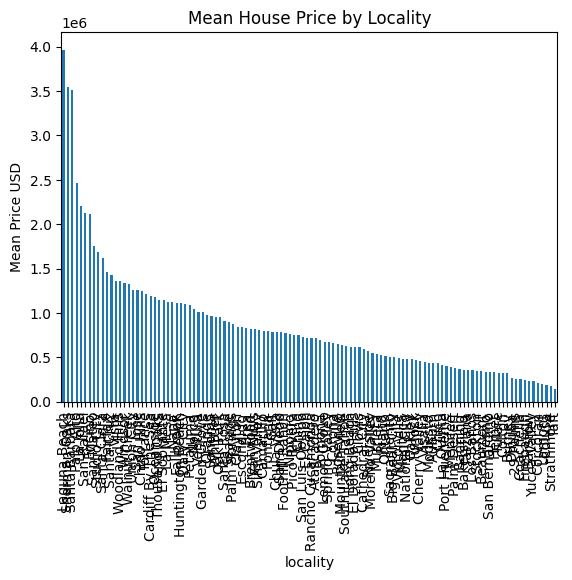

In [5]:
import matplotlib.pyplot as plt
mean_price_by_locality.plot(
    kind="bar",
    xlabel="locality",
    ylabel="Mean Price USD",
    title="Mean House Price by Locality"
)

In [6]:
df["price_per_m2"] = df["price"]/df["floor_size_sq_ft"]
df.head()

,name,price,locality,region,postal_code,address,latitude,longitude,description,bedrooms,bathrooms,floor_size_sq_ft,uniq_id,scraped_at,price_per_m2
0,"10125 Baffin Dr, San Diego, CA 92126",816480.0,San Diego,CA,92126,10125 Baffin Dr,32.900981,-117.153876,This Single Family Residence is located at 101...,3,2,1134.0,8b174963-ff1e-5783-bd6a-fdfa28999104,01/07/2022 18:13:41,720.000000
1,"78345 Terra Cotta Ct, La Quinta, CA 92253",416694.0,La Quinta,CA,92253,78345 Terra Cotta Ct,33.727888,-116.297511,This Condominium is located at 78345 Terra Cot...,2,2,912.0,9add4ef2-73df-5085-972a-70c81dd5b0ac,01/07/2022 18:13:41,456.901316
2,"469 Sandpiper St, Banning, CA 92220",365040.0,Banning,CA,92220,469 Sandpiper St,33.923569,-116.935236,This Single Family Residence is located at 469...,2,2,1471.0,aaab3409-c6c3-5bc3-897c-5b4425492532,01/07/2022 18:13:41,248.157716
3,"18620 Hatteras St 257, Tarzana, CA 91356",366444.0,Tarzana,CA,91356,18620 Hatteras St 257,34.176364,-118.539319,This Condominium is located at 18620 Hatteras ...,2,2,910.0,3f17b279-2a0f-5c56-9bb7-7c998f535953,01/07/2022 18:13:41,402.685714
4,"2075 Mendocino St, Seaside, CA 93955",896416.0,Seaside,CA,93955,2075 Mendocino St,36.620651,-121.829274,This Single Family Residence is located at 207...,3,2,1333.0,01a2f60e-496f-5886-a59d-103097ebb544,01/07/2022 18:13:42,672.480120


<AxesSubplot:title={'center':'Mean House Price per sqM by Locality'}, xlabel='locality', ylabel='Mean Price USD'>

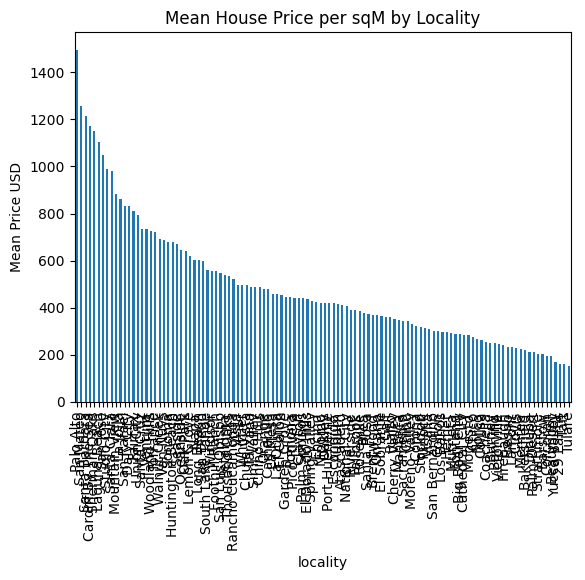

In [7]:
mean_price_per_m2 = df.groupby("locality")["price_per_m2"].mean().sort_values(ascending = False)
mean_price_per_m2.plot(
    kind="bar",
    xlabel="locality",
    ylabel="Mean Price USD",
    title="Mean House Price per sqM by Locality"
)

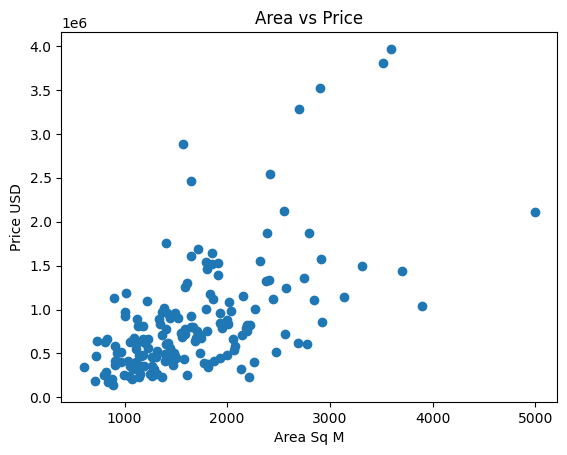

In [8]:
plt.scatter(x=df["floor_size_sq_ft"], y=df["price"])
plt.xlabel("Area Sq M")
plt.ylabel("Price USD")
plt.title("Area vs Price")
plt.show()

In [9]:
p_correlation = df["floor_size_sq_ft"].corr(df["price"])
print("p_correlation(All CA) :", p_correlation)


p_correlation(All CA) : 0.5856343068658998


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164 entries, 0 to 171
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              164 non-null    object 
 1   price             164 non-null    float64
 2   locality          164 non-null    object 
 3   region            164 non-null    object 
 4   postal_code       164 non-null    int64  
 5   address           164 non-null    object 
 6   latitude          164 non-null    float64
 7   longitude         164 non-null    float64
 8   description       164 non-null    object 
 9   bedrooms          164 non-null    int64  
 10  bathrooms         164 non-null    int64  
 11  floor_size_sq_ft  164 non-null    float64
 12  uniq_id           164 non-null    object 
 13  scraped_at        164 non-null    object 
 14  price_per_m2      164 non-null    float64
dtypes: float64(5), int64(3), object(7)
memory usage: 16.0+ KB


In [11]:
df.head()

,name,price,locality,region,postal_code,address,latitude,longitude,description,bedrooms,bathrooms,floor_size_sq_ft,uniq_id,scraped_at,price_per_m2
0,"10125 Baffin Dr, San Diego, CA 92126",816480.0,San Diego,CA,92126,10125 Baffin Dr,32.900981,-117.153876,This Single Family Residence is located at 101...,3,2,1134.0,8b174963-ff1e-5783-bd6a-fdfa28999104,01/07/2022 18:13:41,720.000000
1,"78345 Terra Cotta Ct, La Quinta, CA 92253",416694.0,La Quinta,CA,92253,78345 Terra Cotta Ct,33.727888,-116.297511,This Condominium is located at 78345 Terra Cot...,2,2,912.0,9add4ef2-73df-5085-972a-70c81dd5b0ac,01/07/2022 18:13:41,456.901316
2,"469 Sandpiper St, Banning, CA 92220",365040.0,Banning,CA,92220,469 Sandpiper St,33.923569,-116.935236,This Single Family Residence is located at 469...,2,2,1471.0,aaab3409-c6c3-5bc3-897c-5b4425492532,01/07/2022 18:13:41,248.157716
3,"18620 Hatteras St 257, Tarzana, CA 91356",366444.0,Tarzana,CA,91356,18620 Hatteras St 257,34.176364,-118.539319,This Condominium is located at 18620 Hatteras ...,2,2,910.0,3f17b279-2a0f-5c56-9bb7-7c998f535953,01/07/2022 18:13:41,402.685714
4,"2075 Mendocino St, Seaside, CA 93955",896416.0,Seaside,CA,93955,2075 Mendocino St,36.620651,-121.829274,This Single Family Residence is located at 207...,3,2,1333.0,01a2f60e-496f-5886-a59d-103097ebb544,01/07/2022 18:13:42,672.480120


In [12]:
df_sandiego = df[df["locality"] == "San Diego"]
print("df_sandiego shape:", df_sandiego.shape)
print("df_sandiego type:", type(df_sandiego))
df_sandiego.head()

df_sandiego shape: (12, 15)
df_sandiego type: <class 'pandas.core.frame.DataFrame'>


,name,price,locality,region,postal_code,address,latitude,longitude,description,bedrooms,bathrooms,floor_size_sq_ft,uniq_id,scraped_at,price_per_m2
0,"10125 Baffin Dr, San Diego, CA 92126",816480.0,San Diego,CA,92126,10125 Baffin Dr,32.900981,-117.153876,This Single Family Residence is located at 101...,3,2,1134.0,8b174963-ff1e-5783-bd6a-fdfa28999104,01/07/2022 18:13:41,720.000000
9,"8801 Haveteur Way, San Diego, CA 92123",835596.0,San Diego,CA,92123,8801 Haveteur Way,32.807714,-117.139024,This Single Family Residence is located at 880...,4,2,1344.0,acbc1177-ae8b-5b7f-8fce-0020daddef0b,01/07/2022 18:13:43,621.723214
22,"4065 Porte Ln 165, San Diego, CA 92122",632800.0,San Diego,CA,92122,4065 Porte Ln 165,32.855707,-117.229043,This Condominium is located at 4065 Porte Ln 1...,2,1,806.0,aba8d96e-aa95-5907-9b8d-20e17546cb18,01/07/2022 18:13:45,785.111663
34,"8667 Jackie Dr, San Diego, CA 92119",1005936.0,San Diego,CA,92119,8667 Jackie Dr,32.811695,-117.011392,This Single Family Residence is located at 866...,4,2,1796.0,6032fc70-5217-5898-8994-b5f01f51b131,01/07/2022 18:13:47,560.097996
39,"11289 Provencal Pl, San Diego, CA 92128",638789.0,San Diego,CA,92128,11289 Provencal Pl,32.966693,-117.086298,This Condominium is located at 11289 Provencal...,2,2,1068.0,78a2aaa4-75ed-5553-b0ea-4151b0da9586,01/07/2022 18:13:48,598.117041


In [13]:
p_correlation_sandiego = df_sandiego["floor_size_sq_ft"].corr(df_sandiego["price"])
print("p_correlation_sandiego :", p_correlation_sandiego)

p_correlation_sandiego : 0.7717478098525814


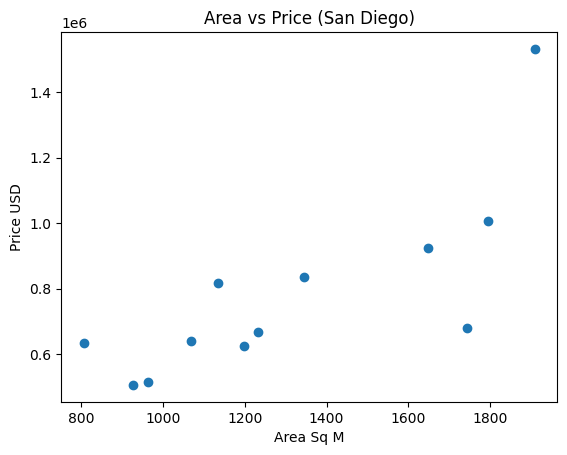

In [14]:
plt.scatter(x=df_sandiego["floor_size_sq_ft"], y=df_sandiego["price"])
plt.xlabel("Area Sq M")
plt.ylabel("Price USD")
plt.title("Area vs Price (San Diego)")
plt.show()